# Wrangle and Analyze data

## Wrangling

The entire dataset consists of 3 subsets:
- The WeRateDogs Twitter archive summerized in the  ```twitter-archive-enhanced.csv``` file
- The tweet image neural network predictions of the breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network a.k.a. ```image-predictions.tsv``` - to be downloaded from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using Requests
- Data pulled out from the Twitter API: retweet count and favorite count at minimum).

### Load necessary libraries

### Gather data

In [2]:
# for data structure, calculations and manipulations of the dataset
import pandas as pd
import numpy as np

# for visualisations
import matplotlib.pyplot as plt

# for importing data from a URL source
import requests as req
from io import StringIO as IO

# for importing Twitter data
import tweepy

# for converting json data to a python dictionary
import json

# for managing running time
import time

#### Prepare the first part - load the WeRateDogs Twitter archive

In [3]:
main_set = pd.read_csv("twitter-archive-enhanced.csv")

In [4]:
main_set.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Prepare the second part - neural network predictions of the dog breed

In [5]:
# Get the file from URL using Requests
sec_file = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Prepare the string for input to the read_csv module
f = IO(sec_file.text)

# Prepare the dataframe
sec_data = pd.read_csv(f, sep='\t')


In [6]:
sec_data.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Prepare the third part - Twitter data

In [71]:
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# Create tweet_json file
tweet_json = open("tweet_json.txt", "w")

# query Twitter to gather json data of the tweets with id numbers from the main_set
start = time.time()
for i in range(main_set.tweet_id.shape[0]):
    
    try:
        tweet = api.get_status(main_set.tweet_id[i], tweet_mode='extended')
        json.dump(tweet._json, tweet_json)
        tweet_json.write('\n')
    except tweepy.TweepError:
        next
    end = time.time()
    print(i)
    print(end - start)

# Seal the tweet_json file
tweet_json.close()


0
0.22478175163269043
1
0.40673828125
2
0.5899252891540527
3
0.7683515548706055
4
0.9437534809112549
5
1.1395478248596191
6
1.3333919048309326
7
1.5405597686767578
8
1.7257578372955322
9
1.8936221599578857
10
2.101951837539673
11
2.2730655670166016
12
2.4493889808654785
13
2.6273603439331055
14
2.8129935264587402
15
2.9993226528167725
16
3.244298219680786
17
3.425271511077881
18
3.6181342601776123
19
3.777787923812866
20
3.967564582824707
21
4.141830921173096
22
4.320096969604492
23
4.512141942977905
24
4.707534551620483
25
4.938744783401489
26
5.116938352584839
27
5.304864168167114
28
5.5036866664886475
29
5.72449517250061
30
5.914114475250244
31
6.0993123054504395
32
6.318927764892578
33
6.4930102825164795
34
6.741092205047607
35
6.934350490570068
36
7.122061729431152
37
7.334888219833374
38
7.564171552658081
39
7.754399061203003
40
7.941701889038086
41
8.118226528167725
42
8.366283416748047
43
8.547847747802734
44
8.717490434646606
45
8.89491081237793
46
9.099093198776245
47
9.27659

In [8]:
# Prepare for sifting out the interesting stuff from the tweet_json.txt file

id_list = []
place_list = []
rt_count_list = []
fav_count_list = []
retweeted_list = []

# Import interesting stuff from tweet_json.txt
with open("tweet_json.txt") as json_tweets:
    for k in json_tweets:
        line = json.loads(k)
        id_list.append(line['id'])
        place_list.append(line['place'])
        rt_count_list.append(line['retweet_count'])
        fav_count_list.append(line['favorite_count'])
        retweeted_list.append(line['retweeted'])

# Convert the lists to a pandas dataframe
twitter_data = pd.DataFrame(
{
    'tweet_id': id_list,
    'place': place_list,
    'retweet_count': rt_count_list,
    'favorite_count': fav_count_list,
    'retweeted': retweeted_list
}
)

After collecting the initial data it's time to marge them into a one dataset. Because all data have a common column - **tweet_id** it will be chosen for merging condition. The INNER JOIN will ensure that only tweets present in all 3 sets are analyzed, i.e. the number of missing data will be reduced.

In [9]:
# Join the datasets

main_sec = main_set.merge(sec_data, how='inner')

data = main_sec.merge(twitter_data, how='inner')

### Assess

After preparing the initial version of the dataset I embark onto the second step, that is **assessing** the data prior to the cleaning process.

In [10]:
# Get to know the number of nulls, datatype and names for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 32 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

Looking at the above summary I notice the following issues:

Quality:
- missing data in: in_reply_to_status_id
- missing data in: in_reply_to_user_id
- missing data in: retweeted_status_id
- missing data in: retweeted_status_user_id
- missing data in: retweeted_status_timestamp
- missing data in: place
- some of the tweets are retweets and need to be removed
- the ```tweet_id``` is an integer and should be a string (it's not meant to be treated as a number and be added, multiplied, etc.)
- there are columns from image predictions that need further processing, starting with p1, p2, p3 - these should be processed to provide p-value, object name and  the name whether the object is a dog for the best image predictions
- the data type of the rating numerator presented in the text is not consistent with the extracted type (some of the values are floats, whereas the extracted one are all integers)
- the dog stage - there is no one value for each tweet; in some data there are two dog stages presented

Tidy:
- the data is spread across 3 separate dataframes
- the dog stages: doggo, floofer, pupper, puppo are spread accross 4 columns and could be formed into 1

In [12]:
data.img_num.unique()

array([1, 2, 3, 4])

#### Dog stages

The dog stages are split into 4 columns and have to be merged into 1, however the structure of the columns has to be inspected

In [9]:
print(data.doggo.unique())
print(data.floofer.unique())
print(data.pupper.unique())
print(data.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


Nice, it looks like apat from the names of the stage there is only ```None``` cathegory.

#### Retweets

Secondly, I'd like to remove all retweets, i.e. tweets, for which retweeted parameter is ```True```. Boolean values are treated by sum function as integers with values 0 for ```False``` and 1 for ```True```. Thus, I can asses the number of retweets by summing the values in ```reweeted``` column.

In [10]:
data.retweeted.sum()

0

It looks like only ```False``` values are present in this column.

#### Rating numerator/denominator problems
It was noted that some problem with rating numerator/denominator is present in the data. Some values may have not been extracted properly. This can be assessed by looking at the numerators and denominators.

In [11]:
data.rating_numerator.unique()

array([  13,   12,   14,    5,   11,   10,    6,   15,    0,   84,   24,
         75,   27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,
         99,   80,   45,   60,   44,  143,  121,   26,    2,  144,   88,
          1,  420])

In [12]:
data.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2])

There are a lot of strangely looking values, e.g. 0 (That would be pretty ostracizing...), 165, 1776, etc. These will have to be corrected in the Cleaning phase.

#### Names
Let's check out the unique values for the name column.

In [13]:
data.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

At the beginnning there are data, which do not look like real names, e.g. None, a, ...
Let's see if sorting these values help.

In [14]:
sorted(data.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert'

Apart from None, there's a huge number of lower case words, which most probably are not real names...

#### Object prediction names
The objects predicted by the artificial neural network are not consistent - they start with small or capital letter and in some cases the words are connected using underscore. The underscore should be replaced by a single space and all names should start with a capital letter.

In [15]:
print(data.p1.unique())
print(data.p2.unique())
print(data.p3.unique())

['orange' 'Chihuahua' 'paper_towel' 'basset' 'Chesapeake_Bay_retriever'
 'Appenzeller' 'Pomeranian' 'Irish_terrier' 'Pembroke' 'Samoyed'
 'French_bulldog' 'golden_retriever' 'whippet' 'Siberian_husky' 'limousine'
 'Mexican_hairless' 'kuvasz' 'convertible' 'pug' 'Blenheim_spaniel'
 'Labrador_retriever' 'malamute' 'Italian_greyhound' 'chow'
 'German_shepherd' 'Doberman' 'Eskimo_dog' 'web_site' 'Weimaraner' 'Saluki'
 'tusker' 'street_sign' 'miniature_pinscher' 'German_short-haired_pointer'
 'English_springer' 'tricycle' 'tabby' 'vizsla' 'Irish_setter' 'bloodhound'
 'Bernese_mountain_dog' 'West_Highland_white_terrier' 'cocker_spaniel'
 'flat-coated_retriever' 'Cardigan' 'Newfoundland' 'basketball'
 'Shetland_sheepdog' 'komondor' 'kelpie' 'home_theater'
 'Greater_Swiss_Mountain_dog' 'comic_book' 'laptop' 'Border_collie' 'pole'
 'bull_mastiff' 'marmot' 'Staffordshire_bullterrier' 'Lakeland_terrier'
 'Australian_terrier' 'syringe' 'envelope' 'Bedlington_terrier' 'lakeside'
 'chimpanzee' 'Ango

### Cleaning

Now that I know the first issues with the data, it's time to clean it!

In [70]:
# Prepare a copy of the main dataset that will be processed
data_copy = data.copy()

First, I'll get rid of the columns with nulls, the columns with information that will not be processed further on and ```retweeted``` column, which contains only ```False``` values.

There are some retweets present in the dataset - all the rows with non-null values in the ```retweet_``` columns. These should be removed.

In [71]:
# Removing retweets based on retweeted_status_id
data_copy = data_copy.drop(data_copy[data_copy.retweeted_status_id > 0].index)

In [72]:
# Test if everything went ok.
data_copy[data_copy.retweeted_status_id > 0].retweeted_status_id.count()

0

In [73]:
data_copy[data_copy.retweeted_status_id > 0].retweeted_status_user_id.count()

0

In [74]:
data_copy[data_copy.retweeted_status_id > 0].retweeted_status_timestamp.count()

0

In [75]:
# Dispose of columns with a lot of nulls (in_reply_to_status_id,
# in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
# retweeted_status_timestamp, place)

data_copy = data_copy.drop('in_reply_to_status_id', axis=1)
data_copy = data_copy.drop('in_reply_to_user_id', axis=1)
data_copy = data_copy.drop('retweeted_status_id', axis=1)
data_copy = data_copy.drop('retweeted_status_user_id', axis=1)
data_copy = data_copy.drop('retweeted_status_timestamp', axis=1)
data_copy = data_copy.drop('place', axis=1)

# Dispose of columns information that will not be used further on (source,
# expanded urls, jpg_url, img_num)


data_copy = data_copy.drop('source', axis=1)
data_copy = data_copy.drop('expanded_urls', axis=1)
data_copy = data_copy.drop('jpg_url', axis=1)
data_copy = data_copy.drop('img_num', axis=1)

# Drop the "retweeted" columnas it contains only False values

data_copy = data_copy.drop('retweeted', axis=1)

In [76]:
# Verify the result
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 21 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
text                  1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
doggo                 1991 non-null object
floofer               1991 non-null object
pupper                1991 non-null object
puppo                 1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null bool
retweet_count         1991 non-null int64
favorite_count        1991 non-null int6

#### Tweet ids

These are integers and should be strings.

In [77]:
# Transform the tweet_ids into strings

data_copy['tweet_id'] = data_copy['tweet_id'].astype(str)

In [78]:
# Make sure it's done right
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 21 columns):
tweet_id              1991 non-null object
timestamp             1991 non-null object
text                  1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
doggo                 1991 non-null object
floofer               1991 non-null object
pupper                1991 non-null object
puppo                 1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null bool
retweet_count         1991 non-null int64
favorite_count        1991 non-null int

#### Rating numerator/denominator

Some values are looking strange, e.g. 0, 165, 1776... The rating should be extracted once again.

In [79]:
ratings = data_copy.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)

In [80]:
# Check out the unique numerator values
ratings[0].unique()

array(['13', '12', '14', '13.5', '11', '6', '10', '0', '84', '24', '9.75',
       '5', '11.27', '3', '7', '8', '9', '4', '165', '1776', '204', '50',
       '99', '80', '45', '60', '44', '143', '121', '11.26', '2', '144',
       '88', '1', '420'], dtype=object)

In [81]:
# Check out the unique denominator values
ratings[1].unique()

array(['10', '70', '7', '150', '11', '170', '20', '50', '90', '80', '40',
       '130', '110', '120', '2'], dtype=object)

Nice... Some floats appeared in the numerator section, which partly explained the strange values. Still, the 0 and other high values are still present, so I have to check if that really is the case. Perhaps the code doesn't work as I think it does.

In [82]:
pd.set_option('display.max_colwidth', -1)

# First, the 0 value
d = data_copy[data_copy['rating_numerator'] == 0].text
print(d)

244    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
826    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object


Nope, these are legit values. Every time a 0 is present something sad happened.

No, let's check other strangely high numerators.

In [83]:
# Then all other numerators

for numer in [84, 24, 165, 1776, 204, 50, 99, 80, 45, 60, 44, 143, 121, 144, 88, 420]:
    e = data_copy[data_copy['rating_numerator'] == numer].text
    print("CHECKING NUMERATOR: {}".format(numer))
    print(e)

CHECKING NUMERATOR: 84
340    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: text, dtype: object
CHECKING NUMERATOR: 24
410    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object
CHECKING NUMERATOR: 165
729    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
CHECKING NUMERATOR: 1776
796    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object
CHECKING NUMERATOR: 204
918    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
CHECKING NUMERATOR: 50
995    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Name: text, dtype:

It looks like two values are false: 24/7 in tweet 410 (as referring to availability 24h 7 days a week) and 50/50 in tweet 995 (where the real rating is 11/10.
The 24/7 value should be removed from the set and the rating in tweet 995 changed to the true value.

In [84]:
condition247 = (data_copy.rating_numerator == 24) & (data_copy.rating_denominator == 7)
data_copy = data_copy.drop(data_copy[condition247].index , axis=0)

Check if the record was deleted properly.

In [85]:
e = data_copy[data_copy['rating_numerator'] == 24].text
print("CHECKING NUMERATOR: {}".format(24))
print(e)

CHECKING NUMERATOR: 24
Series([], Name: text, dtype: object)


Now, change the 50/50 rating to 11/10.

In [86]:
# As there is only one instance of 50/50 rating it can be called like this

condition5050 = (data_copy.rating_numerator == 50) & (data_copy.rating_denominator == 50)

# Change the 50/50 rating to 11/10
index5050 = data_copy[condition5050].index
index5050 = min(index5050)
data_copy.at[index5050, 'rating_numerator'] = 11
data_copy.at[index5050, 'rating_denominator'] = 10

In [87]:
# Test if the change went ok
print(data_copy.at[index5050, 'rating_numerator'], data_copy.at[index5050, 'rating_denominator'])

11 10


Now, I'll double check if similar cleaning is needed for the denominators: 70, 7, 150, 11, 170, 20, 50, 90, 80, 40, 130, 110, 120, 2.

In [88]:
# Checking the denominators

for numer in [70, 7, 150, 11, 170, 20, 50, 90, 80, 40, 130, 110, 120, 2]:
    e = data_copy[data_copy['rating_denominator'] == numer].text
    print("CHECKING DENOMINATOR: {}".format(numer))
    print(e)

CHECKING DENOMINATOR: 70
340    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: text, dtype: object
CHECKING DENOMINATOR: 7
Series([], Name: text, dtype: object)
CHECKING DENOMINATOR: 150
729    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
CHECKING DENOMINATOR: 11
870     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1399    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
Name: text, dtype: object
CHECKING DENOMINATOR: 170
918    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
CHECKING DENOMINATOR: 20
961    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Name: text, dty

There is a problem with three ratings:
- 9/11 (referring to the tragic events of WTC) with proper rating of 14/10 (index 870)
- 7/11 which refers to some other person/object, should be replaced with 10/10 (index 1399)
- 1/2 (which refers to the dogs being 3 1/2 legged), whould be replaced with 9/10 (index 2045)

In [89]:
# Change the 9/11 rating to 14/10
data_copy.at[870, 'rating_numerator'] = 14
data_copy.at[870, 'rating_denominator'] = 10

In [90]:
# Test if the change went ok
print(data_copy.at[870, 'rating_numerator'], data_copy.at[870, 'rating_denominator'])

14 10


In [91]:
# Change the 7/11 rating to 10/10
data_copy.at[1399, 'rating_numerator'] = 10
data_copy.at[1399, 'rating_denominator'] = 10

In [92]:
# Test if the change went ok
print(data_copy.at[1399, 'rating_numerator'], data_copy.at[1399, 'rating_denominator'])

10 10


In [93]:
# Change the 1/2 rating to 9/10
data_copy.at[2045, 'rating_numerator'] = 9
data_copy.at[2045, 'rating_denominator'] = 10

In [94]:
# Test if the change went ok
print(data_copy.at[2045, 'rating_numerator'], data_copy.at[2045, 'rating_denominator'])

9 10


Clean the badly assessed names. These were identified in the Assess seciton as lowercased, so all lowercased content in the Name column will be replaced with ```None```.

In [95]:
condition_lower = (data_copy.name == data_copy.name.str.lower())

data_copy.loc[condition_lower == True, 'name'] = 'None'

In [96]:
# Check if the change went ok.

sorted(data_copy.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert'

The doggo, floofer, pupper and puppo should all be placed in a single column named ```dog_stage```.

In [97]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']

data_copy['dog_stage'] = ''

data_copy = data_copy.reset_index(drop = True)

for n in range(data_copy.shape[0]):
    dummy = []
    for stags in stages:
        if data_copy[stags][n] == stags:
            dummy.append(data_copy[stags][n])
        else:
            next
    if len(dummy) == 0:
        data_copy['dog_stage'][n] = 'None'
    else:
        data_copy['dog_stage'][n] = ','.join(dummy)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [98]:
# Verify the result

data_copy.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

The doggo, floofer, pupper, puppo columns can now be dropped.

In [99]:
data_copy = data_copy.drop('doggo', axis = 1)
data_copy = data_copy.drop('floofer', axis = 1)
data_copy = data_copy.drop('pupper', axis = 1)
data_copy = data_copy.drop('puppo', axis = 1)

In [100]:
# Verify the drop

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 18 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null object
text                  1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
p2                    1990 non-null object
p2_conf               1990 non-null float64
p2_dog                1990 non-null bool
p3                    1990 non-null object
p3_conf               1990 non-null float64
p3_dog                1990 non-null bool
retweet_count         1990 non-null int64
favorite_count        1990 non-null int64
dog_stage             1990 non-null object
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 239.1+ KB


Finally, the image prediction columns (starting with p1, p2, p3) should be replaced with a columns containing:
- the highest p-value (```p_value```)
- object prediction (```object_prediction```)
- information whether the identified object is a dog (```is_dog```)

In [101]:
# Leaving only the best prediction in a row

is_dog = []
object_prediction = []
p_value = []

for s in range(data_copy.shape[0]):
    
    #Choose the best prediction
    x = (data_copy.loc[s, 'p1'], data_copy.loc[s, 'p1_conf'], data_copy.loc[s, 'p1_dog'])
    y = (data_copy.loc[s, 'p2'], data_copy.loc[s, 'p2_conf'], data_copy.loc[s, 'p2_dog'])
    z = (data_copy.loc[s, 'p3'], data_copy.loc[s, 'p3_conf'], data_copy.loc[s, 'p3_dog'])
    max_p = max([x, y, z], key = lambda h: (x[1], y[1], z[1]))
        
    # Append the result to the specific list
    is_dog.append(max_p[2])
    object_prediction.append(max_p[0])
    p_value.append(max_p[1])

In [102]:
# Populate the new columns with the computed values

data_copy['is_dog'] = is_dog
data_copy['object_prediction'] = object_prediction
data_copy['p_value'] = p_value

In [104]:
# Verify the formation of the new columns
data_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage,is_dog,object_prediction,p_value
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,orange,0.097049,False,bagel,...,False,banana,0.076110,False,8221,37732,None,False,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,Chihuahua,0.323581,True,Pekinese,...,True,papillon,0.068957,True,6077,32400,None,True,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,Chihuahua,0.716012,True,malamute,...,True,kelpie,0.031379,True,4021,24396,None,True,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,paper_towel,0.170278,False,Labrador_retriever,...,True,spatula,0.040836,False,8375,41038,None,False,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,basset,0.555712,True,English_springer,...,True,German_short-haired_pointer,0.175219,True,9080,39232,None,True,basset,0.555712


Drop the original image prediction columns.

In [105]:
data_copy = data_copy.drop('p1', axis = 1)
data_copy = data_copy.drop('p1_conf', axis = 1)
data_copy = data_copy.drop('p1_dog', axis = 1)

data_copy = data_copy.drop('p2', axis = 1)
data_copy = data_copy.drop('p2_conf', axis = 1)
data_copy = data_copy.drop('p2_dog', axis = 1)

data_copy = data_copy.drop('p3', axis = 1)
data_copy = data_copy.drop('p3_conf', axis = 1)
data_copy = data_copy.drop('p3_dog', axis = 1)

In [106]:
# Verify the deletion

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 12 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null object
text                  1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
retweet_count         1990 non-null int64
favorite_count        1990 non-null int64
dog_stage             1990 non-null object
is_dog                1990 non-null bool
object_prediction     1990 non-null object
p_value               1990 non-null float64
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 173.0+ KB


#### Object prediction names
The object prediction names should all start with a capisal letter and the underscores should be substituted with a single space.

In [107]:
data_copy.object_prediction = data_copy.object_prediction.str.capitalize()
data_copy.object_prediction = data_copy.object_prediction.str.replace('_', ' ')

In [108]:
data_copy.object_prediction.unique()

array(['Orange', 'Chihuahua', 'Paper towel', 'Basset',
       'Chesapeake bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'Golden retriever', 'Whippet', 'Siberian husky', 'Limousine',
       'Mexican hairless', 'Kuvasz', 'Convertible', 'Pug',
       'Blenheim spaniel', 'Malamute', 'Italian greyhound', 'Chow',
       'German shepherd', 'Doberman', 'Eskimo dog', 'Labrador retriever',
       'Web site', 'Weimaraner', 'Saluki', 'Tusker', 'Street sign',
       'Miniature pinscher', 'German short-haired pointer',
       'English springer', 'Tricycle', 'Tabby', 'Vizsla', 'Bloodhound',
       'Bernese mountain dog', 'West highland white terrier',
       'Cocker spaniel', 'Flat-coated retriever', 'Cardigan',
       'Newfoundland', 'Basketball', 'Shetland sheepdog', 'Komondor',
       'Kelpie', 'Home theater', 'Greater swiss mountain dog',
       'Comic book', 'Laptop', 'Border collie', 'Pole', 'Bull mastiff',
       'Marmot', 

## 2. Storing, analyzing and visualizing

The data should be stored in the ```twitter_archive_master.csv``` file.

In [109]:
data_copy.to_csv("twitter_archive_master.csv", index = False)

The wrangled data must now be analyzed and visialized. At least three (3) insights and one (1) visualization must be produced.

In [110]:
# Insight 1
data_copy.favorite_count.describe()

count    1990.000000  
mean     8647.136181  
std      12691.949000 
min      77.000000    
25%      1857.000000  
50%      3899.000000  
75%      10771.000000 
max      162815.000000
Name: favorite_count, dtype: float64

The tweets are very unequally rated. With a min of 77 and max of 163k this means 4 orders of magnitude... Still, 50% of them were favorited 1.9k-10.7k times, which is not that bad. The large spread explains the gigantic standard deviation of 12.7k.

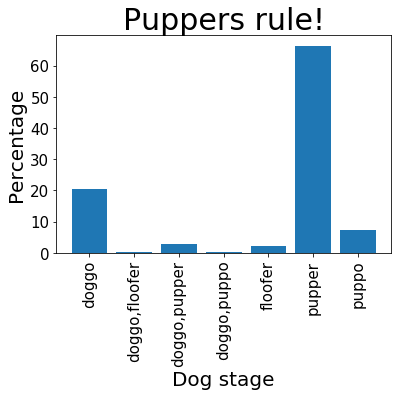

In [112]:
# Insight 2
# In several hundred cases it was possible to identify dogs "stage"

ds = data_copy.dog_stage.value_counts()

h_tot = data_copy.dog_stage.count() - ds['None']

h1 = 100*ds['pupper'] / h_tot
h2 = 100*ds['doggo'] / h_tot
h3 = 100*ds['puppo'] / h_tot
h4 = 100*ds['doggo,pupper'] / h_tot
h5 = 100*ds['floofer'] / h_tot
h6 = 100*ds['doggo,floofer'] / h_tot
h7 = 100*ds['doggo,puppo'] / h_tot

plt.bar(x=['pupper', 'doggo', 'puppo', 'doggo,pupper', 'floofer', 'doggo,floofer', 'doggo,puppo'], height=[h1, h2, h3, h4, h5, h6, h7]);
plt.xlabel('Dog stage', size=20);
plt.xticks(size=15, rotation=90);
plt.ylabel('Percentage', size=20);
plt.yticks(size=15)
plt.title('Puppers rule!', size=30);

In [113]:
data_copy.dog_stage.value_counts()

None             1684
pupper           203 
doggo            63  
puppo            22  
doggo,pupper     9   
floofer          7   
doggo,puppo      1   
doggo,floofer    1   
Name: dog_stage, dtype: int64

You gotta admit that in these rare 300+ cases, in which the dog stage was identified, puppers are the most popular by being 66.34% of the pack.

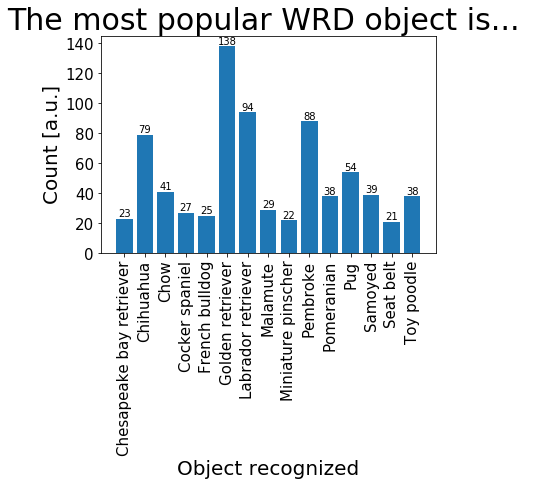

In [114]:
# Insight 3
# There are some specific breeds that are posted more often than others

dogs = data_copy.object_prediction.value_counts().index.tolist()[:15]
heights = data_copy.object_prediction.value_counts()[:15]

bar1 = plt.bar(x=dogs, height=heights);

# Adding numerical counts near the bars
# After https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python/40491960

for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xlabel('Object recognized', size=20);
plt.xticks(size=15, rotation=90);
plt.ylabel('Count [a.u.]', size=20);
plt.yticks(size=15)
plt.title('The most popular WRD object is... ', size=30);

In [115]:
data_copy.p_value.describe(percentiles=[0.25,0.5,0.75,0.9, 0.95, 0.99])

count    1990.000000
mean     0.593406   
std      0.271875   
min      0.044333   
25%      0.362656   
50%      0.587357   
75%      0.843883   
90%      0.967120   
95%      0.990225   
99%      0.999498   
max      1.000000   
Name: p_value, dtype: float64

#### Yep, clearly Retrievers are the favorites... Around 140 Golden retrievers, almost 94 Labrador retrievers, nearly 90 Pembrokes and 80 Chihuahuas. :] Even though, these results should be treated with caution (I've taken the maximum p-value for the prediction and but only about 10% of the predictions meet the alfa=0.05 threshold), the result is still intriguing.
I guess this explains a bit why Labs and Golden Retrievers are one of the most popular dogs I see in the family drama movies. :P
Obviously, there are dogs and non-dogs in the above graph, but I consider it still a valid result. It would not be the first time I see/get a picture of a toy or some other stuff with a funny AND abstract comment. I find it hilarious. :]

In [127]:
conditioness = (data_copy.dog_stage == "pupper") & (data_copy.p_value >= 0.95)
data_copy.at[143,'text']

'This is Zeke. He performs group cheeky wink tutorials. Pawfect execution here. 12/10 would wink back https://t.co/uMH5CLjXJu'